In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              ExtraTreesClassifier,
                              BaggingClassifier,
                              AdaBoostClassifier)
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [13]:
def results(model,norm): #Taken from my project 3
    """
    parameters:
        model = takes in a fitted grid search model and retrieves the accuracy scores for it based on the train test split variables
        norm = 'true' or 'false' (string) - Idicates whether to normalize the Confusion Matrix or not
    """
    preds = model.predict(X_test_mct)
    print('--------------------------------------------------')
    print('Evaluations Scores:')
    print("Accuracy Scores:",model.score(X_train_mct, y_train), model.score(X_test_mct, y_test))
    print("RMSE:",mean_squared_error(y_test,preds,squared=False))
    print("Recall Score:",recall_score(y_test,preds))
    print("Precision Score:",precision_score(y_test,preds))
    print("F1 Scores:",f1_score(y_test,preds))
    ConfusionMatrixDisplay.from_estimator(model,X_test_mct,y_test,cmap='Blues',normalize=norm);
    print('--------------------------------------------------')

In [14]:
df = pd.read_csv('../data/weather_cleaned.csv')

In [15]:
df['RainTomorrow'].value_counts(normalize=True)

0    0.779741
1    0.220259
Name: RainTomorrow, dtype: float64

In [16]:
#df.info()

In [17]:
#Ignoring the time-based sunshine and cloud observations for now
X = df[['Location',
        'MinTemp',
        'MaxTemp',
        'Rainfall',
        'Evaporation',
        'Sunshine',
        'WindGustDir',
        'WindGustSpeed',
        'RainToday',
        'Month']]
y = df['RainTomorrow']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

In [19]:
mct = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'),['Location','WindGustDir','Month']),
    (StandardScaler(),['MinTemp',
        'MaxTemp',
        'Rainfall',
        'Evaporation',
        'Sunshine',
        'WindGustSpeed'])
)

In [20]:
X_train_mct = mct.fit_transform(X_train)
X_test_mct = mct.fit_transform(X_test)

#### Tried seeing what would happen if I didn't transform the numerical features, turned out absolutely horrible on the logistic classifier. F1 Score of 0.00385

In [21]:
encode = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'),['Location','WindGustDir','Month'])
)
X_train_enc = encode.fit_transform(X_train)
X_test_enc = encode.fit_transform(X_test)

### Logistic Regression (No Grid Search)

--------------------------------------------------
Evaluations Scores:
Accuracy Scores: 0.8304383788254756 0.8304856433888692
RMSE: 0.41172121224334657
Recall Score: 0.45896363051174766
Precision Score: 0.6676029962546817
F1 Scores: 0.5439633797444211
--------------------------------------------------


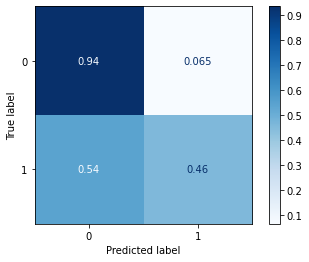

In [22]:
logr = LogisticRegression()
logr.fit(X_train_mct,y_train)
results(logr,'true')

--------------------------------------------------
Evaluations Scores:
Accuracy Scores: 0.8246012052463665 0.8206309819213045
RMSE: 0.4235197965605569
Recall Score: 0.4110074026392018
Precision Score: 0.6459281740010117
F1 Scores: 0.502360346184107
--------------------------------------------------


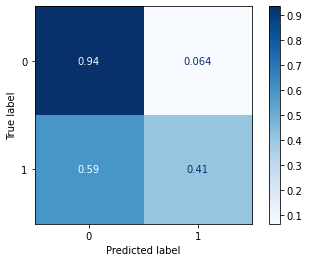

In [23]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_mct,y_train)
results(dtc,'true')

--------------------------------------------------
Evaluations Scores:
Accuracy Scores: 0.8420181968569065 0.8345267635590217
RMSE: 0.40678401694385485
Recall Score: 0.47183778564531703
Precision Score: 0.6790180639184807
F1 Scores: 0.5567793391568553
--------------------------------------------------


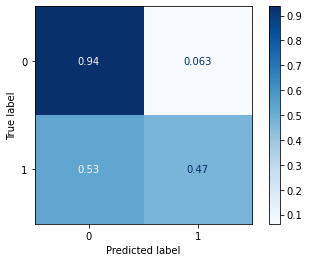

In [24]:
bc = BaggingClassifier(max_samples = 0.03, n_estimators = 100)
bc.fit(X_train_mct,y_train)
results(bc,'true')

--------------------------------------------------
Evaluations Scores:
Accuracy Scores: 0.791705069124424 0.7903580290677065
RMSE: 0.45786676111320146
Recall Score: 0.05568072095268748
Precision Score: 0.8826530612244898
F1 Scores: 0.10475325461701483
--------------------------------------------------


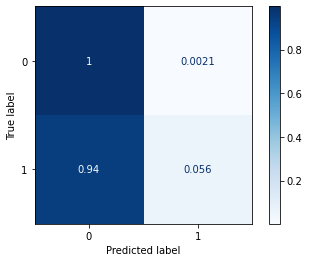

In [25]:
rfc = RandomForestClassifier(max_depth = 5, n_estimators=100)
rfc.fit(X_train_mct,y_train)
results(rfc,'true')

--------------------------------------------------
Evaluations Scores:
Accuracy Scores: 0.8315963606286187 0.8288550159517901
RMSE: 0.4136967295594804
Recall Score: 0.4824589636305118
Precision Score: 0.6503253796095445
F1 Scores: 0.5539541759053954
--------------------------------------------------


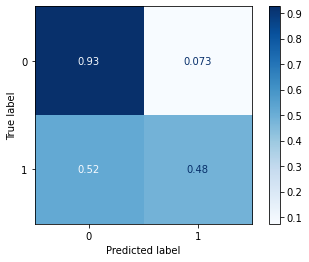

In [26]:
ada = AdaBoostClassifier()
ada.fit(X_train_mct,y_train)
results(ada,'true')